# Ejemplo de uso de métricas de evaluación en clasificadores ML.

# Carga y exploración dataset

## Carga dataset

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


## Exploración dataset

In [3]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
print(test_data[0])
print(test_labels[0])

[1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
0


## Preparación conjuntos para entrenamiento, validación y pruebas

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_data,train_labels,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(20000,) (20000,)
(5000,) (5000,)


# Entrenamiento y evaluación

## Entrenamiento

In [6]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy="stratified") # No aprende, es como un "volado"
clf.fit(X_train,y_train) #entrenamiento
print(clf.score(test_data,test_labels)) #Accuracy promedio

0.49984


## Evaluación

In [7]:
y_pred = clf.predict(test_data) #Prueba con el set de pruebas

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

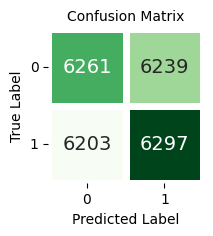

In [9]:
import pandas as pd

cm = confusion_matrix(test_labels, y_pred)

# Las listas deben de ser con el mismo número de elementos que las clases
df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

# Matriz del mismo tamaño que el número de clases
f,ax = plt.subplots(figsize=(2,2))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()

In [10]:
from sklearn.metrics import recall_score, precision_score, accuracy_score,f1_score

In [11]:
print("Accuracy: ", accuracy_score(test_labels,y_pred))
print("Precision: ", precision_score(test_labels,y_pred))
print("Recall: ", recall_score(test_labels,y_pred))
print("F1 Score: ", f1_score(test_labels,y_pred))

Accuracy:  0.50232
Precision:  0.5023133375877473
Recall:  0.50376
F1 Score:  0.5030356286946797


In [12]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     12500
           1       0.50      0.50      0.50     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



## Gráficas ROC y AUC

In [13]:
from sklearn.metrics import roc_curve, auc

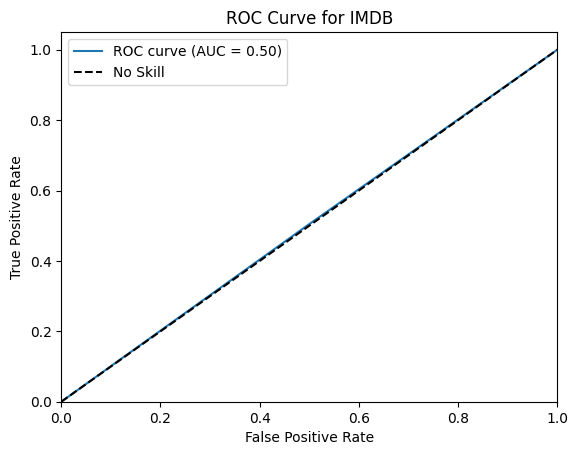

In [14]:
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for IMDB')
plt.legend()
plt.show()